<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

# New Section

In [0]:
#Code to download imags automatically paste it to chrome->developer tools ->console
#code for chrome

'''  
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));


'''


In [0]:
path = Path("content//sample_data")
print(path)
for file, folder in [('apple.csv', 'apple'), ('pom.csv', 'pom')
                    ]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest)

content/sample_data


FileNotFoundError: ignored

# New Section

# New Section

# New Section

# New Section

In [0]:
for folder in ('apple', 'pom'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)

apple


cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000081.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000140.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000133.png'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000076.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000053.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000130.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000135.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000011.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000126.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000099.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000127.png'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000122.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000037.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000052.png'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000075.png'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000163.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/apple/00000145.png'>
pom


cannot identify image file <_io.BufferedReader name='content/sample_data/pom/00000081.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/pom/00000041.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/pom/00000078.jpg'>


None


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [0]:
data.classes

['apple', 'pom']

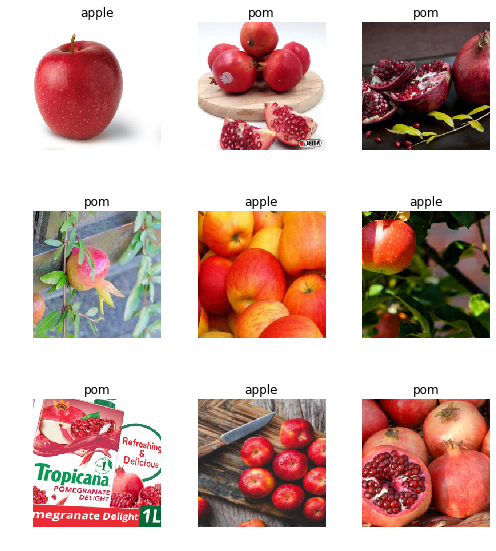

In [0]:
data.show_batch(rows=3, figsize=(7, 8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apple', 'pom'], 2, 214, 53)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 25827691.61it/s]


In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.809757,0.472154,0.150943,0.849057,00:04
1,0.613637,0.321952,0.150943,0.849057,00:03
2,0.464449,0.267981,0.150943,0.849057,00:03
3,0.381730,0.192884,0.094340,0.905660,00:04
4,0.329870,0.178739,0.094340,0.905660,00:03


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
losses,idxs = interp.top_losses()

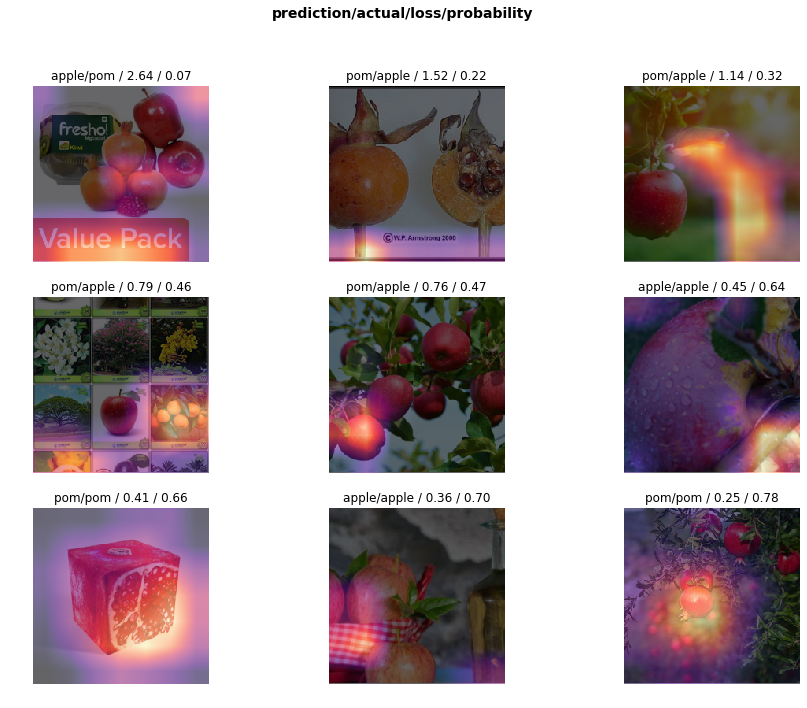

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

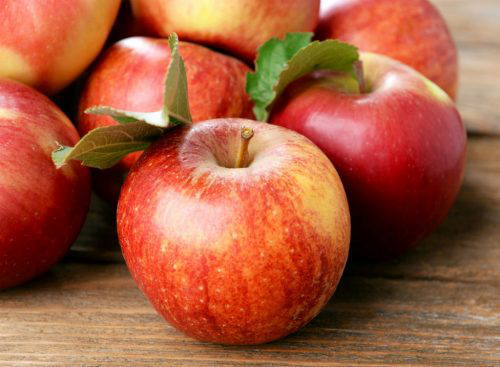

In [0]:
img = open_image(path/'test2.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category apple